<a href="https://colab.research.google.com/github/joaochenriques/FFT_Testing/blob/main/FFT_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as mpl

In [2]:
# If running python on Windows operating system, copy the file:
# https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py
# to the working folder before running the notebook

import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py 

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (6,4.5)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3483  100  3483    0     0  15831      0 --:--:-- --:--:-- --:--:-- 15831


In [3]:
f = 2.0
ω = 2.0 * np.pi * f 
t = np.linspace( 0, 100, 1024 )
y = np.sin( ω * t  )

In [14]:
nFFT = 1024

fsample = 1.0 / ( t[1] - t[0] )
delta_f = fsample / nFFT

fd_time = np.arange( nFFT ) / fsample
fd_data = np.copy( y[-nFFT:] )  

0.999511599482467

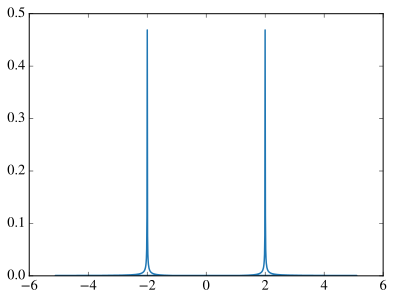

In [64]:
freqs = np.fft.fftfreq( n = nFFT, d = 1.0 / fsample )   # FFT frequencies
Amps = np.fft.fft( fd_data, norm='forward' )            # FFT complex amplitudes

Spec_Af  = 2.0 * np.abs( Amps )                         # abs amplitudes 
Spec_Var = 0.5 * Spec_Af**2                             # Variance spectrum
Spec_Sf  = Spec_Var / delta_f                           # Spectral density

Spec_A_mean = np.sqrt( sum( Spec_Sf ) * delta_f )       # mean Amplitude

mpl.plot( freqs, np.abs( Amps ) )

Spec_A_mean

0.9995120739522929

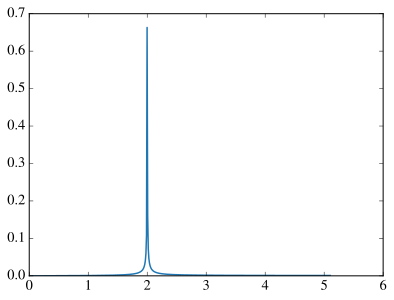

In [65]:
freqs = np.fft.rfftfreq( n = nFFT, d = 1.0 / fsample )      # FFT frequencies
Amps = np.sqrt(2) * np.fft.rfft( fd_data, norm='forward' )  # FFT complex amplitudes

Spec_Af  = 2.0 * np.abs( Amps )                             # abs amplitudes 
Spec_Var = 0.5 * Spec_Af**2                                 # Variance spectrum
Spec_Sf  = Spec_Var / delta_f                               # Spectral density

Spec_A_mean = np.sqrt( sum( Spec_Sf ) * delta_f )           # mean Amplitude

mpl.plot( freqs, np.abs( Amps ) )
Spec_A_mean

In [44]:
Amps = np.sqrt(2) * np.fft.rfft( fd_data )  
Amps

array([ 5.21898733e-13+0.00000000e+00j,  1.88767638e-05-6.15284919e-03j,
        7.55127659e-05-1.23065131e-02j,  1.69925139e-04-1.84618067e-02j,
        3.02142450e-04-2.46195459e-02j,  4.72204730e-04-3.07805479e-02j,
        6.80163491e-04-3.69456314e-02j,  9.26081772e-04-4.31156171e-02j,
        1.21003419e-03-4.92913283e-02j,  1.53210699e-03-5.54735910e-02j,
        1.89239811e-03-6.16632345e-02j,  2.29101726e-03-6.78610919e-02j,
        2.72808600e-03-7.40680004e-02j,  3.20373782e-03-8.02848016e-02j,
        3.71811829e-03-8.65123422e-02j,  4.27138511e-03-9.27514744e-02j,
        4.86370826e-03-9.90030561e-02j,  5.49527013e-03-1.05267952e-01j,
        6.16626566e-03-1.11547032e-01j,  6.87690248e-03-1.17841175e-01j,
        7.62740109e-03-1.24151268e-01j,  8.41799500e-03-1.30478204e-01j,
        9.24893096e-03-1.36822887e-01j,  1.01204691e-02-1.43186227e-01j,
        1.10328832e-02-1.49569148e-01j,  1.19864608e-02-1.55972581e-01j,
        1.29815035e-02-1.62397469e-01j,  1.40183274